In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

#设置绘图大小
plt.style.use({'figure.figsize':(25,20)})

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False


In [2]:
housing_data=pd.read_csv('housing_data.csv')
X=housing_data.drop(['MEDV'],axis=1)
y=housing_data['MEDV']
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[5,10,20,50,100,200],#决策树的个数
    'max_depth':[3,5,7],#最大树深，树太深会造成过拟合
    'max_features':[0.6,0.7,0.8,1]#决策树划分时考虑的最大特征数
}
rf = RandomForestRegressor()

grid = GridSearchCV(rf,param_grid=param_grid,cv=3)

grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_features': [0.6, 0.7, 0.8, 1],
                         'n_estimators': [5, 10, 20, 50, 100, 200]})

In [4]:
#查看效果最好的模型
grid.best_params_

{'max_depth': 5, 'max_features': 0.7, 'n_estimators': 100}

In [5]:
#制定效果最好参数对应的模型
rf_reg=grid.best_estimator_
rf_reg

RandomForestRegressor(max_depth=5, max_features=0.7)

In [6]:
from sklearn.tree import export_graphviz
import os
os.environ["PATH"] += os.pathsep + 'E:/Program Files (x86)/Graphviz2.38/bin/'


In [7]:
#特征重要度分析
rf_reg.feature_importances_

array([0.44043116, 0.45725627, 0.10231257])

In [8]:
X.columns

Index(['RM', 'LSTAT', 'PTRATIO'], dtype='object')

In [9]:
print('特征排序：')
feature_names=X.columns
feature_importances=rf_reg.feature_importances_
indices=np.argsort(feature_importances)

for index in indices:
    print('feature %s (%f)' %(feature_names[index],feature_importances[index]))

特征排序：
feature PTRATIO (0.102313)
feature RM (0.440431)
feature LSTAT (0.457256)


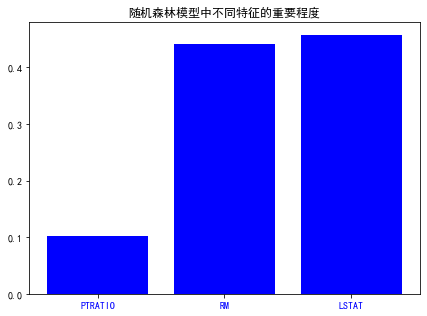

In [10]:
plt.figure(figsize=(7,5))
plt.title('随机森林模型中不同特征的重要程度')
plt.bar(range(len(feature_importances)),feature_importances[indices],color='b')
plt.xticks(range(len(feature_importances)),np.array(feature_names)[indices],color='b')
plt.show()

In [11]:
#可视化测试集上回归预测的结果
result={"labels":y_test,"prediction":rf_reg.predict(x_test)}
result=pd.DataFrame(result)

In [12]:
result.head()

,labels,prediction
15,417900.0,433164.346206
250,632100.0,647595.217455
142,281400.0,339424.783065
392,577500.0,342268.847629
90,474600.0,501071.467189


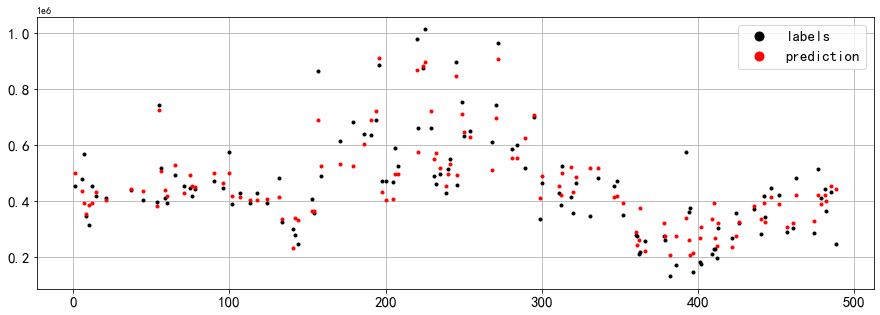

In [13]:
result['labels'].plot(style='k.',figsize=(15,5))
result['prediction'].plot(style='r.')
plt.legend(fontsize=15,markerscale=3)#设置图例字号以及图例大小
plt.tick_params(labelsize=15)#设置坐标数字大小
plt.grid()

In [14]:
#计算均方误差和均方根误差
from sklearn import metrics
MSE=metrics.mean_squared_error(y,rf_reg.predict(X))
RMSE=np.sqrt(MSE)
print('(MSE,RMSE)=',(MSE,RMSE))

(MSE,RMSE)= (2929249033.7146063, 54122.53720692154)
